In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [33]:
# Set up paths to merged data files
merged_data_path = os.path.join(os.getcwd(), 'data', 'merged_data')
master_train_path = os.path.join(merged_data_path, 'master_train.csv')
master_forecast_path = os.path.join(merged_data_path, 'master_forecast.csv')

In [34]:
df_master_train = pd.read_csv(master_train_path, low_memory=False)
# Convert date column to datetime (CSV files don't preserve data types)
df_master_train['date'] = pd.to_datetime(df_master_train['date'])
# Convert string columns to proper string dtype for consistency
string_columns = ['articleId', 'promo_id', 'category', 'mainProductGroup', 'holidayEventName', 'doWName']
for col in string_columns:
    if col in df_master_train.columns:
        df_master_train[col] = df_master_train[col].astype('string')
df_master_train.info()

df_master_forecast = pd.read_csv(master_forecast_path, low_memory=False)
df_master_forecast['date'] = pd.to_datetime(df_master_forecast['date'])
string_columns = ['articleId', 'promo_id', 'category', 'mainProductGroup', 'holidayEventName', 'doWName']
for col in string_columns:
    if col in df_master_forecast.columns:
        df_master_forecast[col] = df_master_forecast[col].astype('string')

df_master_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343849 entries, 0 to 343848
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   343849 non-null  datetime64[ns]
 1   articleId              343849 non-null  string        
 2   storeCount             343849 non-null  int64         
 3   FSC_index              343831 non-null  float64       
 4   sales_volume_index     343849 non-null  float64       
 5   promo_id               46012 non-null   string        
 6   discountPct            43964 non-null   float64       
 7   category               343849 non-null  string        
 8   mainProductGroup       343849 non-null  string        
 9   holidayEventIndicator  343849 non-null  int64         
 10  workingDayIndicator    343849 non-null  int64         
 11  holidayEventName       14371 non-null   string        
 12  doWName                343849 non-null  stri

# 2. Missing Data Analysis

MISSING DATA ANALYSIS
                  Missing Count  Missing Percentage
holidayEventName         329478           95.820549
discountPct              299885           87.214155
promo_id                 297837           86.618545
FSC_index                    18            0.005235


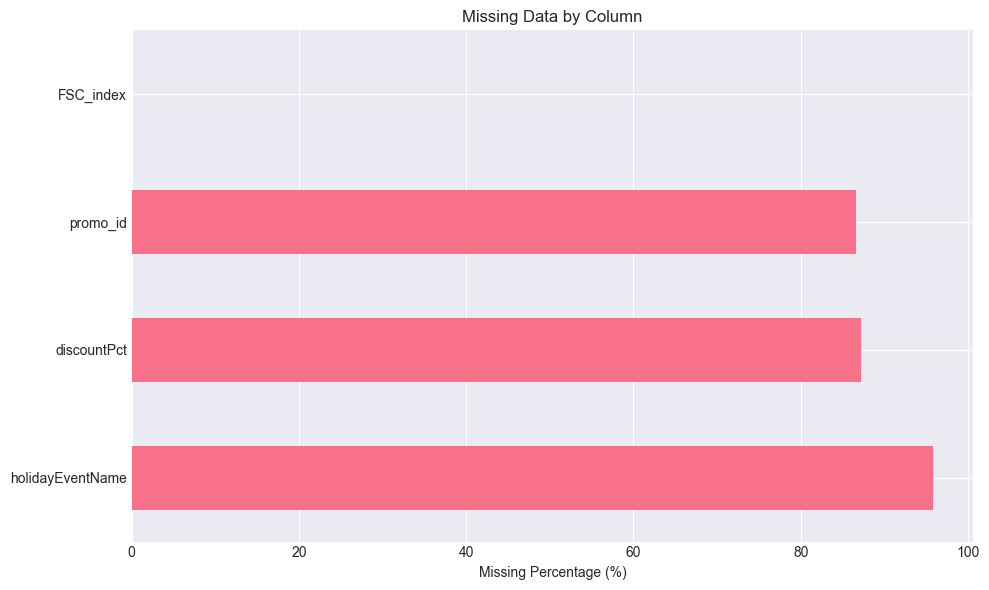

In [35]:
# Missing data analysis
missing_data = df_master_train.isnull().sum()
missing_pct = (missing_data / len(df_master_train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("=" * 60)
print("MISSING DATA ANALYSIS")
print("=" * 60)
print(missing_df)

# Visualize missing data
if len(missing_df) > 0:
    plt.figure(figsize=(10, max(6, len(missing_df) * 0.4)))
    missing_df['Missing Percentage'].plot(kind='barh')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Data by Column')
    plt.tight_layout()
    plt.show()

In [39]:
df_master_train.loc[
    df_master_train['promo_id'].notna() & df_master_train['discountPct'].isna(),
    ['date', 'articleId', 'promo_id', 'discountPct']
]


,date,articleId,promo_id,discountPct
103,2021-01-01,6f5a9e267b6f25ac369e33959557743dc377e36484fe0d...,eaa09b63937fa6b108f49f262c8ba1229f91330e148466...,NaN
345,2021-01-02,6f5a9e267b6f25ac369e33959557743dc377e36484fe0d...,eaa09b63937fa6b108f49f262c8ba1229f91330e148466...,NaN
587,2021-01-03,6f5a9e267b6f25ac369e33959557743dc377e36484fe0d...,eaa09b63937fa6b108f49f262c8ba1229f91330e148466...,NaN
4283,2021-01-18,d4597b7a3d16b5606d331197bb0f63a56059c8c4554b26...,e58d91ea4d61d70063ec2098c24653534f771fefd34955...,NaN
4323,2021-01-18,f1d923c56db9d83ae82cc77769316ba0f2a80b3038f479...,e58d91ea4d61d70063ec2098c24653534f771fefd34955...,NaN
...,...,...,...,...
313274,2024-07-27,fd1338f0bdfc5ae7eecc09c16764703c02c14c31f11ff7...,a8d320769573dcd5ab50d5c3742f03003e841eb260f1ae...,NaN
313334,2024-07-28,3fc79b08869f8326c5f6f4a37208002094cbb4a0503956...,a8be64e70f364c4da2e197f09cc71d30f67cf442b0210b...,NaN
313357,2024-07-28,5628b1c39f36c2c195af1090e15c88b704ac1a7927157c...,6e57a8c16b370708a1578a302359b88a3b9e5a2ad024a4...,NaN
313466,2024-07-28,d8d3b9f27e87b0a61e40cf296ac316abc8c1db795563d4...,a8d320769573dcd5ab50d5c3742f03003e841eb260f1ae...,NaN


# 3. Target Variable Analysis (Sales Volume Index)

# 4. Time Series Analysis

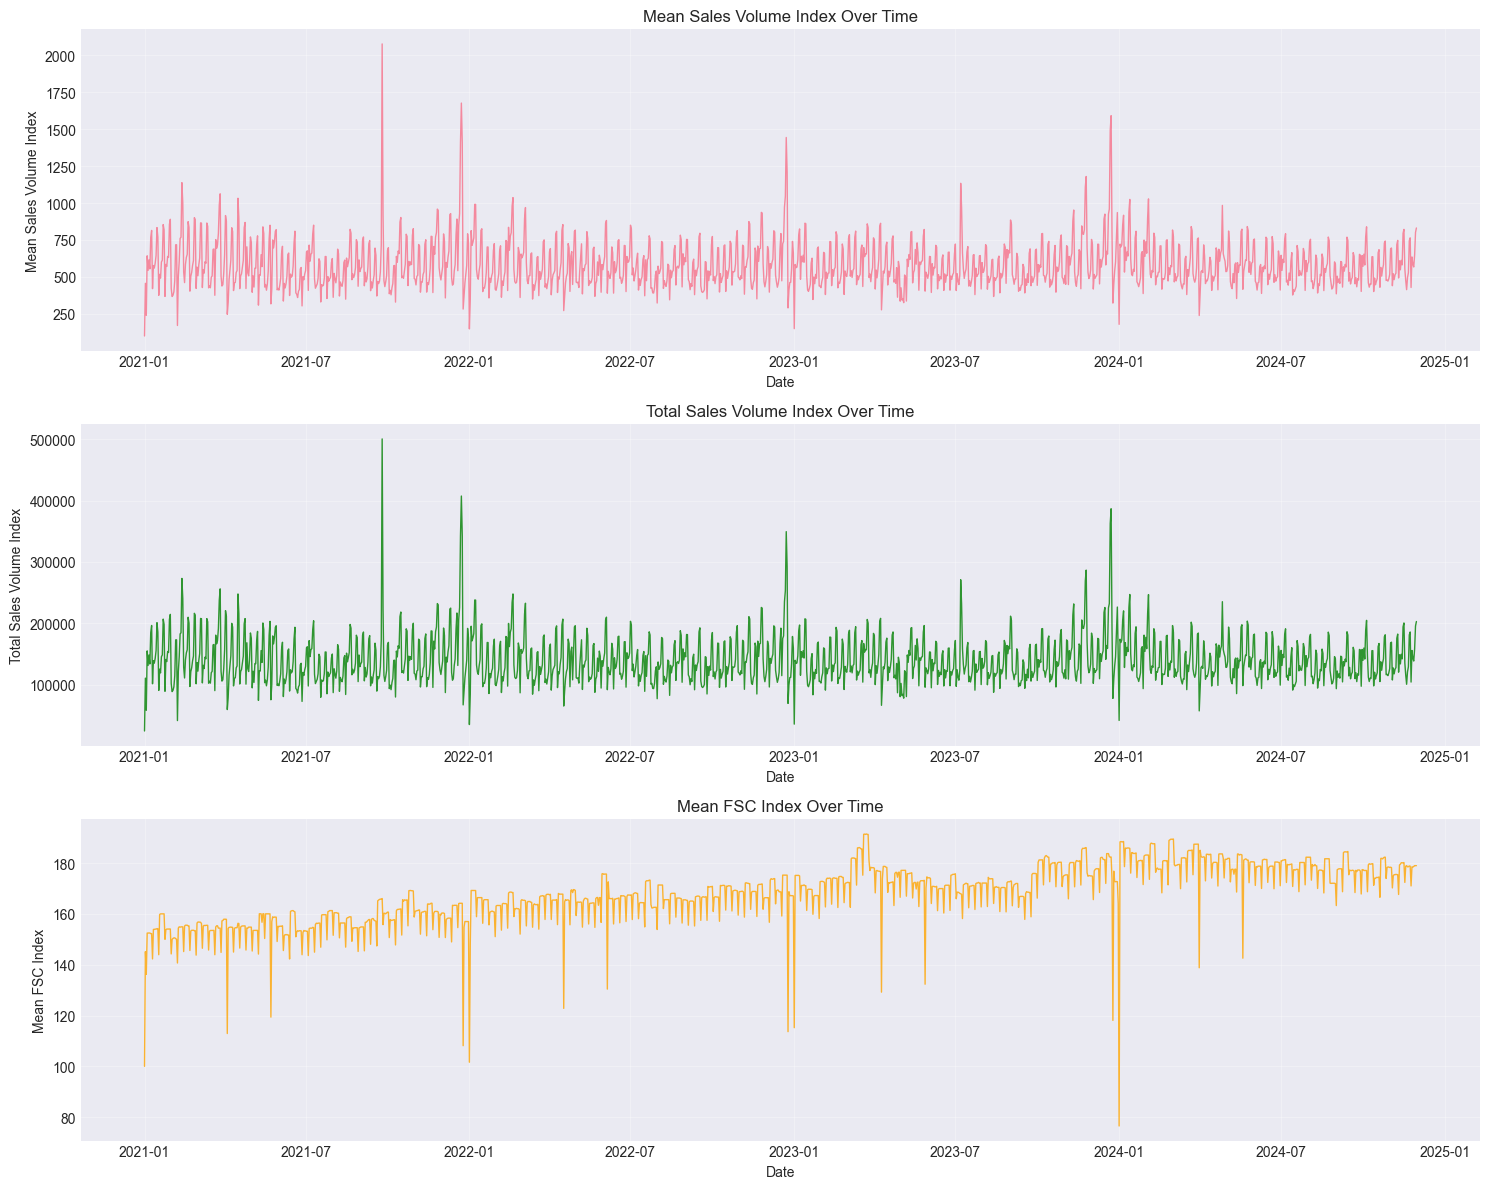

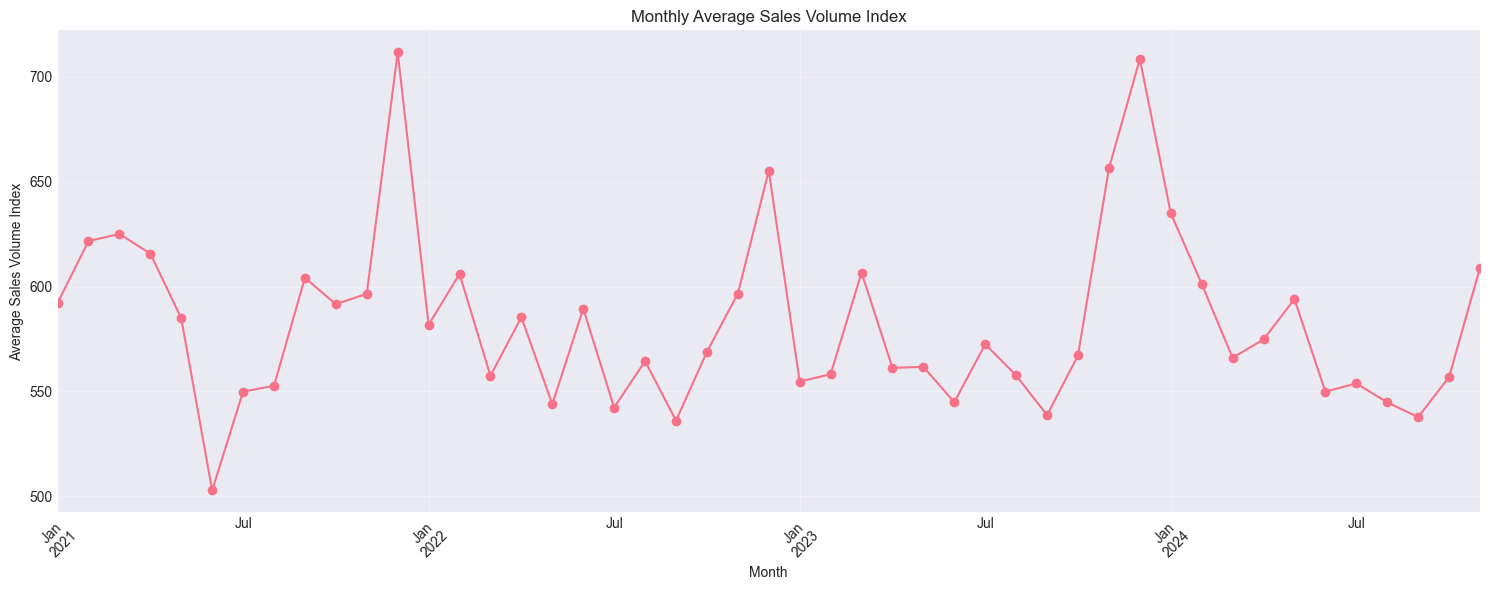

In [27]:
# Time series analysis - aggregate sales over time
daily_sales = df_master_train.groupby('date').agg({
    'sales_volume_index': ['mean', 'sum', 'std'],
    'FSC_index': 'mean'
}).reset_index()
daily_sales.columns = ['date', 'mean_sales', 'total_sales', 'std_sales', 'mean_fsc']

# Plot time series
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Mean sales over time
axes[0].plot(daily_sales['date'], daily_sales['mean_sales'], linewidth=1, alpha=0.8)
axes[0].set_title('Mean Sales Volume Index Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean Sales Volume Index')
axes[0].grid(True, alpha=0.3)

# Total sales over time
axes[1].plot(daily_sales['date'], daily_sales['total_sales'], linewidth=1, alpha=0.8, color='green')
axes[1].set_title('Total Sales Volume Index Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Sales Volume Index')
axes[1].grid(True, alpha=0.3)

# FSC index over time
axes[2].plot(daily_sales['date'], daily_sales['mean_fsc'], linewidth=1, alpha=0.8, color='orange')
axes[2].set_title('Mean FSC Index Over Time')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Mean FSC Index')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Monthly patterns
df_master_train['year_month'] = df_master_train['date'].dt.to_period('M')
monthly_sales = df_master_train.groupby('year_month')['sales_volume_index'].mean()

plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Average Sales Volume Index')
plt.xlabel('Month')
plt.ylabel('Average Sales Volume Index')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Categorical Variable Analysis

In [ ]:
# Analyze categorical variables
categorical_vars = ['category', 'mainProductGroup', 'doWName', 'holidayEventIndicator', 'workingDayIndicator']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, var in enumerate(categorical_vars):
    if var in df_master_train.columns:
        if var in ['holidayEventIndicator', 'workingDayIndicator']:
            # For binary variables, show counts
            value_counts = df_master_train[var].value_counts().sort_index()
            axes[idx].bar(value_counts.index.astype(str), value_counts.values)
            axes[idx].set_title(f'{var} Distribution')
            axes[idx].set_xlabel(var)
            axes[idx].set_ylabel('Count')
        else:
            # For other categorical variables, show top 15
            value_counts = df_master_train[var].value_counts().head(15)
            axes[idx].barh(range(len(value_counts)), value_counts.values)
            axes[idx].set_yticks(range(len(value_counts)))
            axes[idx].set_yticklabels(value_counts.index, fontsize=8)
            axes[idx].set_title(f'Top 15 {var}')
            axes[idx].set_xlabel('Count')
        axes[idx].grid(True, alpha=0.3, axis='x')

# Remove empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

# Sales by category
print("\n" + "=" * 60)
print("SALES BY CATEGORY")
print("=" * 60)
category_sales = df_master_train.groupby('category').agg({
    'sales_volume_index': ['mean', 'sum', 'count']
}).round(2)
category_sales.columns = ['Mean Sales', 'Total Sales', 'Record Count']
print(category_sales.sort_values('Mean Sales', ascending=False))

# Sales by main product group
print("\n" + "=" * 60)
print("SALES BY MAIN PRODUCT GROUP")
print("=" * 60)
product_group_sales = df_master_train.groupby('mainProductGroup').agg({
    'sales_volume_index': ['mean', 'sum', 'count']
}).round(2)
product_group_sales.columns = ['Mean Sales', 'Total Sales', 'Record Count']
print(product_group_sales.sort_values('Mean Sales', ascending=False))

# Sales by day of week
print("\n" + "=" * 60)
print("SALES BY DAY OF WEEK")
print("=" * 60)
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = df_master_train.groupby('doWName')['sales_volume_index'].mean().reindex(dow_order)
print(dow_sales)

plt.figure(figsize=(10, 6))
dow_sales.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Sales Volume Index by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales Volume Index')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 6. Promotion Analysis

In [ ]:
# Promotion impact analysis
df_master_train['has_promo'] = df_master_train['promo_id'].notna()
promo_analysis = df_master_train.groupby('has_promo').agg({
    'sales_volume_index': ['mean', 'median', 'std', 'count'],
    'discountPct': 'mean'
}).round(2)

print("=" * 60)
print("PROMOTION IMPACT ANALYSIS")
print("=" * 60)
print(promo_analysis)

# Discount percentage analysis
if df_master_train['discountPct'].notna().sum() > 0:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Distribution of discount percentages
    discount_data = df_master_train['discountPct'].dropna()
    axes[0].hist(discount_data, bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Discount Percentages')
    axes[0].set_xlabel('Discount Percentage (%)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, alpha=0.3)
    
    # Sales vs Discount
    promo_df = df_master_train[df_master_train['discountPct'].notna()].copy()
    axes[1].scatter(promo_df['discountPct'], promo_df['sales_volume_index'], 
                   alpha=0.3, s=10)
    axes[1].set_title('Sales Volume Index vs Discount Percentage')
    axes[1].set_xlabel('Discount Percentage (%)')
    axes[1].set_ylabel('Sales Volume Index')
    axes[1].grid(True, alpha=0.3)
    
    # Compare sales with and without promotion
    promo_comparison = df_master_train.groupby('has_promo')['sales_volume_index'].mean()
    axes[2].bar(['No Promotion', 'With Promotion'], promo_comparison.values, 
               color=['lightcoral', 'lightgreen'], edgecolor='black')
    axes[2].set_title('Average Sales: Promotion vs No Promotion')
    axes[2].set_ylabel('Average Sales Volume Index')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

# 7. Weather Variable Analysis

In [ ]:
# Key weather variables correlation with sales
weather_vars = ['mean_temp', 'min_temp', 'max_temp', 'mean_wind_speed', 
                'rel_humidity', 'precip_duration', 'sunshine_hours', 'mean_pressure']

# Calculate correlations
weather_correlations = {}
for var in weather_vars:
    if var in df_master_train.columns:
        corr = df_master_train[var].corr(df_master_train['sales_volume_index'])
        weather_correlations[var] = corr

corr_df = pd.DataFrame(list(weather_correlations.items()), 
                       columns=['Weather Variable', 'Correlation with Sales'])
corr_df = corr_df.sort_values('Correlation with Sales', key=abs, ascending=False)

print("=" * 60)
print("WEATHER VARIABLES CORRELATION WITH SALES")
print("=" * 60)
print(corr_df)

# Visualize correlations
plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in corr_df['Correlation with Sales']]
plt.barh(corr_df['Weather Variable'], corr_df['Correlation with Sales'], color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Correlation with Sales Volume Index')
plt.title('Weather Variables Correlation with Sales')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Temperature impact on sales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Mean temperature vs sales
axes[0].scatter(df_master_train['mean_temp'], df_master_train['sales_volume_index'], 
               alpha=0.1, s=5)
axes[0].set_title('Sales Volume Index vs Mean Temperature')
axes[0].set_xlabel('Mean Temperature')
axes[0].set_ylabel('Sales Volume Index')
axes[0].grid(True, alpha=0.3)

# Binned temperature analysis
df_master_train['temp_bin'] = pd.cut(df_master_train['mean_temp'], bins=10)
temp_bin_sales = df_master_train.groupby('temp_bin')['sales_volume_index'].mean()
axes[1].bar(range(len(temp_bin_sales)), temp_bin_sales.values)
axes[1].set_xticks(range(len(temp_bin_sales)))
axes[1].set_xticklabels([str(x) for x in temp_bin_sales.index], rotation=45, ha='right', fontsize=8)
axes[1].set_title('Average Sales by Temperature Range')
axes[1].set_xlabel('Temperature Range')
axes[1].set_ylabel('Average Sales Volume Index')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 8. Correlation Matrix

In [ ]:
# Select numeric columns for correlation analysis
numeric_cols = df_master_train.select_dtypes(include=[np.number]).columns.tolist()
# Focus on key variables
key_vars = ['sales_volume_index', 'FSC_index', 'storeCount', 'discountPct',
           'holidayEventIndicator', 'workingDayIndicator', 'mean_temp', 
           'mean_wind_speed', 'rel_humidity', 'sunshine_hours', 'mean_pressure']

# Filter to available columns
key_vars = [v for v in key_vars if v in numeric_cols]
corr_matrix = df_master_train[key_vars].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Key Variables')
plt.tight_layout()
plt.show()

# Top correlations with sales_volume_index
sales_correlations = corr_matrix['sales_volume_index'].sort_values(key=abs, ascending=False)
sales_correlations = sales_correlations[sales_correlations.index != 'sales_volume_index']

print("=" * 60)
print("TOP CORRELATIONS WITH SALES VOLUME INDEX")
print("=" * 60)
print(sales_correlations.head(10))

# 9. Product-Level Analysis

In [ ]:
# Analyze top products by sales
product_stats = df_master_train.groupby('articleId').agg({
    'sales_volume_index': ['mean', 'sum', 'std', 'count'],
    'FSC_index': 'mean',
    'storeCount': 'mean',
    'discountPct': lambda x: x.notna().sum()  # Count of promotions
}).round(2)

product_stats.columns = ['Mean Sales', 'Total Sales', 'Std Sales', 'Days', 'Mean FSC', 'Mean Stores', 'Promo Days']
product_stats = product_stats.sort_values('Total Sales', ascending=False)

print("=" * 60)
print("TOP 20 PRODUCTS BY TOTAL SALES")
print("=" * 60)
print(product_stats.head(20))

# Distribution of products
print("\n" + "=" * 60)
print("PRODUCT STATISTICS")
print("=" * 60)
print(f"Total Unique Products: {df_master_train['articleId'].nunique()}")
print(f"Average Records per Product: {df_master_train.groupby('articleId').size().mean():.1f}")
print(f"Median Records per Product: {df_master_train.groupby('articleId').size().median():.1f}")

# Visualize product sales distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of mean sales per product
product_mean_sales = df_master_train.groupby('articleId')['sales_volume_index'].mean()
axes[0].hist(product_mean_sales, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Mean Sales per Product')
axes[0].set_xlabel('Mean Sales Volume Index')
axes[0].set_ylabel('Number of Products')
axes[0].grid(True, alpha=0.3)

# Top 20 products
axes[1].barh(range(20), product_stats.head(20)['Total Sales'].values)
axes[1].set_yticks(range(20))
axes[1].set_yticklabels(product_stats.head(20).index, fontsize=8)
axes[1].set_title('Top 20 Products by Total Sales')
axes[1].set_xlabel('Total Sales Volume Index')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# 10. Summary Statistics for All Numeric Variables

In [ ]:
# Comprehensive summary statistics
print("=" * 60)
print("SUMMARY STATISTICS - KEY NUMERIC VARIABLES")
print("=" * 60)
key_numeric = ['sales_volume_index', 'FSC_index', 'storeCount', 'discountPct',
               'mean_temp', 'min_temp', 'max_temp', 'mean_wind_speed',
               'rel_humidity', 'sunshine_hours', 'mean_pressure']

key_numeric = [v for v in key_numeric if v in df_master_train.columns]
print(df_master_train[key_numeric].describe().T)